Examples for the classical and quantum solution for system specifications verification. 

In [ ]:
# This cell is the command used to convert the quantum_check.ipynb file into a python script
#!jupyter nbconvert --to script quantum_check.ipynb

In [2]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_distribution
import qiskit.quantum_info as qi
import numpy as np
from quantum_check import construct_circuit, check_consistency
from classical_check import check_specification_consistency
from qiskit.providers.fake_provider import GenericBackendV2

Classical algorithm tests.

Examples:

- Consistent n = 8
- Inconsistent n = 8

In [9]:
terms = ["0x0xx1xx","xx0xxx1x","x10xx1xx"]
var = 3
print(f"Terms: {terms}")
print(f"{check_specification_consistency(var, terms)}")
if check_specification_consistency(var, terms):
    print("System is consistent\n")
else:
    print("System is inconsistent\n")


terms = ["0xxxx0xx","1x0xxx1x","x1xxx1xx"]
print(f"Terms: {terms}")
print(f"{check_specification_consistency(var, terms)}")
if check_specification_consistency(var, terms):
    print("System is consistent\n")
else:
    print("System is inconsistent\n")

Terms: ['0x0xx1xx', 'xx0xxx1x', 'x10xx1xx']
True
System is consistent

Terms: ['0xxxx0xx', '1x0xxx1x', 'x1xxx1xx']
False
System is inconsistent



Simulation of quantum circuit using AerSimulator. This simualtion works on a classical machine, testing various parameters. 

Examples:

- Consistent n = 8
- Inconsistent n = 8

The system is consistent. C=0.23664319132398462


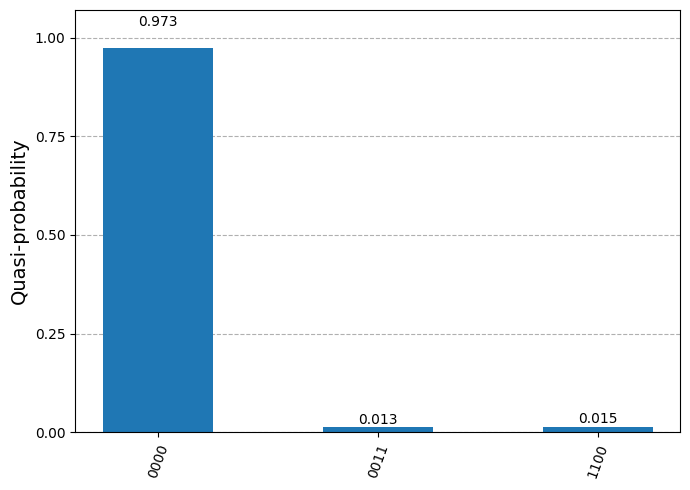

In [6]:
terms = ["0x0xx1xx","xx0xxx1x","x10xx1xx"]
var = 8
func = 3

circ = construct_circuit(terms, var, func)
#circ.draw("mpl");

simulator = AerSimulator()
circ = transpile(circ, simulator)

result = simulator.run(circ).result()
runs = 1000
probabilities = {k:v/runs for k,v in result.get_counts().items()}
plot_distribution(probabilities);

p0011=probabilities.get('0011',0)
p1100=probabilities.get('1100',0)

check_consistency([p0011,p1100]);


The system is inconsistent. C=0.0


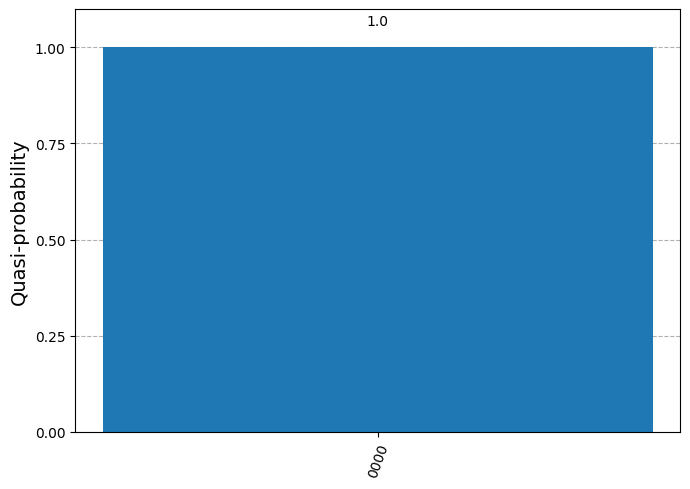

In [7]:
terms = ["0xxxx0xx","1x0xxx1x","x1xxx1xx"]
var = 8
func = 3

circ = construct_circuit(terms, var, func)
#circ.draw("mpl");

simulator = AerSimulator()
circ = transpile(circ, simulator)

result = simulator.run(circ).result()
runs = 1000
probabilities = {k:v/runs for k,v in result.get_counts().items()}
plot_distribution(probabilities);

p0011=probabilities.get('0011',0)
p1100=probabilities.get('1100',0)

check_consistency([p0011,p1100]);

Consistent and inconsistent system simulation with noise

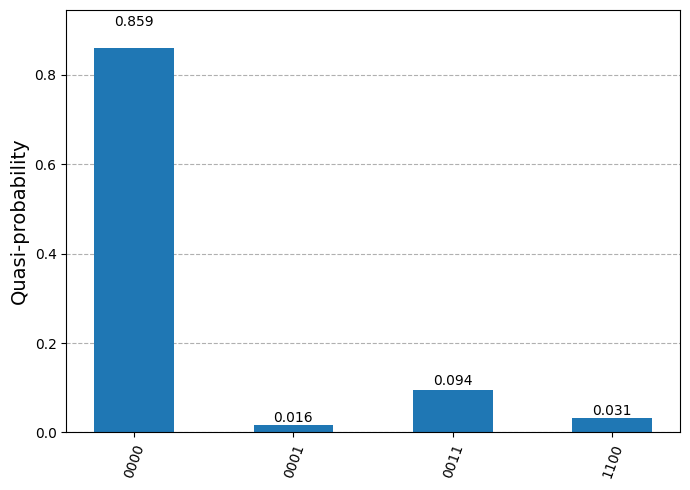

In [4]:
terms = ["0x1x","0xx0","x01x"]
var = 4
func = 3
  
circ = construct_circuit(terms, var, func)

backend = GenericBackendV2(len(circ.qubits))
circ = transpile(circ, backend)

shots = 64
result = backend.run(circ, shots=shots)
probabilities = {k:v/shots for k,v in result.result().get_counts().items()}

plot_distribution(probabilities);
        

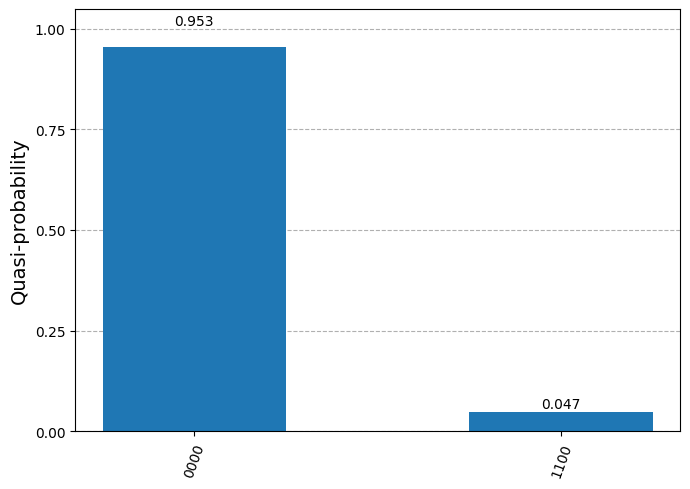

In [5]:
terms = ["0x11","1xx0","x00x"]
var = 4
func = 3
  
circ = construct_circuit(terms, var, func)

backend = GenericBackendV2(len(circ.qubits))
circ = transpile(circ, backend)

shots = 64
result = backend.run(circ, shots=shots)
probabilities = {k:v/shots for k,v in result.result().get_counts().items()}

plot_distribution(probabilities);